In [1]:
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from bs4 import BeautifulSoup
from collections import OrderedDict 
import time
from datetime import datetime, timedelta


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
driver=webdriver.Chrome(executable_path="C:\python37\chromedriver.exe")
driver.maximize_window()

<ipython-input-2-83f597078576>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(executable_path="C:\python37\chromedriver.exe")


In [3]:
driver.get('https://www.instagram.com/')

In [129]:
username="SAMPLE_USERNAME"
password="SAMPLE_PASSWORD"

In [5]:
wait=WebDriverWait(driver,10)

In [6]:
#log in
def LogIn(username,password):
    #enter username and password
    user_name=driver.find_element('name','username')
    user_name.send_keys(username)
    pass_word=driver.find_element('name','password')
    pass_word.send_keys(password)
    #locate login button
    button=wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="loginForm"]/div[1]/div[3]/button/div')))
    button.submit()
    #save your login info not now
    pop = wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="react-root"]/section/main/div/div/div/div/button')))
    pop.click()
    

In [7]:
LogIn(username,password)

### Problem 1 : Analyse the habits of bloggers

Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

1.From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

2.Now Find the number of posts these handles have done in the previous 3 days.

3.Depict this information using a suitable graph.

### 1.From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [8]:
handels_list=['dilsefoodie','delhifoodguide','foodzee','foodie_incarnate','delhifoodwalks',
              'yourfoodlab','food_lunatic','thegreatindianfoodie','nagpurfoodgram','satshyaa']

In [9]:
def search_profile(s):
    driver.find_element('xpath','//input[@Placeholder="Search"]').send_keys(s)
    time.sleep(2)
    open_prof=WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,'//div[@class="_aa61"]//a')))
    open_prof.click()
    time.sleep(2)

In [10]:
def top_5_handels(lst):
    dict={}
    for i in lst:
        search_profile(i)
        time.sleep(2)
        #locate followers 
        followers=WebDriverWait(driver,10).until(EC.presence_of_all_elements_located((By.CLASS_NAME,'_ac2a')))[1]
        dict[i]=int(followers.get_attribute('title').replace(',',''))
        time.sleep(2)
        driver.refresh()
        time.sleep(10)
    count=0
    res=OrderedDict()
    for i in sorted(dict,key=dict.get,reverse=True):
        res[i]=dict[i]
        count+=1
        if count>=5:
            break
    return res

In [11]:
top_handels=top_5_handels(handels_list)
top_handels

OrderedDict([('yourfoodlab', 2008012),
             ('foodie_incarnate', 1374043),
             ('foodzee', 1301019),
             ('dilsefoodie', 1026254),
             ('thegreatindianfoodie', 363796)])

In [12]:
for key,value in top_handels.items():
    print(key,'->',value)

yourfoodlab -> 2008012
foodie_incarnate -> 1374043
foodzee -> 1301019
dilsefoodie -> 1026254
thegreatindianfoodie -> 363796


### 2.Now Find the number of posts these handles have done in the previous 3 days.

In [13]:
def count_of_post(day):
    try:
        post=wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_aagw')))
        post.click()
        count=0
        
        while True:
            #getting date of post
            temp=wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_aaqe')))
            #getting date in string format
            date_string=temp.get_attribute('datetime')
            #converting into date format
            date=datetime.strptime(date_string[0:19],"%Y-%m-%dT%H:%M:%S")
            #taking diffrence between todays date and posted date
            if (datetime.now()-date).days>day:
                break
            else:
                count+=1
            #locating next button
            next_but=WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,'//button[@class="_abl-"]//*[@aria-label="Next"]')))
            next_but.click()
        #closing the post
        exit=WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,'//div[@class="o9tjht9c jar9mtx6 mbzxb4f5 njoytozt"]/div')))
        exit.click()
        return count
    except TimeoutException :
        print ("Something went wrong! Try Again")

In [14]:
total_post_count={}
for i in top_handels:
    search_profile(i)
    time.sleep(2)
    count=count_of_post(3)
    total_post_count[i]=count
    time.sleep(2)
    driver.refresh()
    time.sleep(10)

In [15]:
print('Number of posts these handles have done in the previous 3 days : -')
for i in total_post_count:
    print(i,total_post_count[i])

Number of posts these handles have done in the previous 3 days : -
yourfoodlab 2
foodie_incarnate 5
foodzee 1
dilsefoodie 5
thegreatindianfoodie 0


### 3.Depict this information using a suitable graph.

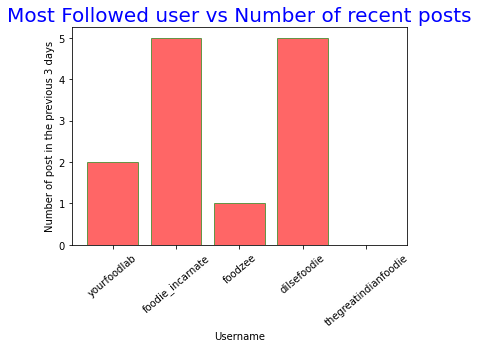

In [16]:
x=total_post_count.keys()
y=total_post_count.values()
plt.bar(x,y,color='red',alpha=0.6,edgecolor='g')
plt.ylabel("Number of post in the previous 3 days",size=10)
plt.xlabel("Username",size=10)
plt.xticks(rotation=40)
plt.title("Most Followed user vs Number of recent posts",fontsize=20, color='blue')
plt.show()

# Problem 2 : List of hashtags

Your friend also needs a list of hashtags that he should use in his posts.

1.Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

2.Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

3.Create a csv file with two columns : the word and its frequency

4.Now, find the hashtags that were most popular among these bloggers

5.Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

In [17]:
def extract_content(lst):
    try :
        hashtags_list = []
        for user in lst:
            #This fuction will search a user and open that profile
            search_profile(user)
            time.sleep(2)
            #just for scrolling to getting post
            driver.execute_script('window.scrollTo(0, 3000);')
            time.sleep(2)
            driver.execute_script('window.scrollTo(0, -3000);')
            time.sleep(2)
            #locating the post of the user
            posts = WebDriverWait(driver,10).until(EC.presence_of_all_elements_located((By.CLASS_NAME,'_aagw')))
            for post in posts[:10]:
                post.click()
                time.sleep(2)
                #locating all hashtag used in this post
                hashtags=driver.find_elements('xpath','//div[@class="_a9zr"]//a[contains(@class,"oajrlxb2")]')
                for h in hashtags:
                    #appending in list
                    a=h.text
                    if "#" in a:
                        hashtags_list.append(a)
                    
                #locating close button and clicking on it
                close=WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,'//div[@class="o9tjht9c jar9mtx6 mbzxb4f5 njoytozt"]/div')))
                close.click()
            time.sleep(2)
            driver.refresh()
            time.sleep(10)
        return hashtags_list
    
    except TimeoutException :
        print ("Something went wrong! Try Again")

In [18]:
handles=list(total_post_count.keys())
hashtags= extract_content(handles)

In [19]:
print(hashtags)


['#IndiaILove', '#IndiaAt75', '#indoremerijaan', '#2Million', '#YFL', '#recipe', '#foodie', '#indiancuisine', '#foodporn', '#frankie', '#schezwan', '#schezwanfrankie', '#foodporn', '#streetfood', '#foodstagram', '#recipe', '#foodporn', '#streetfood', '#rewind', '#foodism', '#yourfoodlab', '#sanjyotkeer', '#homemade', '#monsoon', '#foodiesofindia', '#indianfood', '#ussalVada', '#pancake', '#IndiaLove', '#indiaat75', '#IndiaLove', '#indiaat75', '#recipe', '#foodie', '#indiancuisine', '#desert', '#pancake', '#pancakeday', '#pancakelover', '#sanjyotkeer', '#yourfoodlab', '#foodporn', '#YFL', '#burmesekhowsuey', '#yourfoodlab', '#sanjyotkeer', '#monsoonswithyfl', '#indorespecial', '#bhuttekakees', '#foodporn', '#foodieincarnate', '#sodelhi', '#foodtalkindia', '#newdelhi', '#delhigram', '#desifood', '#ruralindia', '#santacruz', '#mumbaifood', '#munbaifoodie', '#somumbai', '#pakora', '#indianrecipes', '#samosa', '#vadapav', '#bangalorefood', '#pavbhaji', '#bhajji', '#delhistreetfood', '#stree

### 2.Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [20]:
dict={}
words_list=[]
for word in hashtags:
    dict[word]=dict.get(word,0)+1
for i in sorted(dict,key=dict.get,reverse=True):
    words_list.append([i,dict[i]])
    print(i,dict[i])

#delhistreetfood 15
#streetfood 13
#recipe 11
#thegreatindianfoodie 11
#foodieincarnate 10
#dilsefoodie 9
#dilsecouple 9
#foodporn 8
#delhigram 8
#desifood 8
#desikhana 8
#mumbaistreetfood 8
#indianfoodbloggers 8
#foodzeee 8
#sodelhi 7
#foodtalkindia 7
#newdelhi 7
#indianstreetfood 7
#indianfood 6
#streetfoodindia 6
#reelkarofeelkaro 6
#tgif 6
#foodie 5
#delhifoodblogger 5
#foodblogger 5
#indianfoodie 5
#indianfoodblogger 5
#delhifood 5
#foodgasm 4
#mumbai 4
#delhi 4
#reels 4
#indiancuisine 3
#yourfoodlab 3
#sanjyotkeer 3
#homemade 3
#foodiesofindia 3
#foodpornshare 3
#foodlover 3
#foodgram 3
#foodiesofinstagram 3
#delhifoodie 3
#reelitfeelit 3
#reelsinstagram 3
#viralfood 3
#explore 3
#thali 3
#paneer 3
#icecream 3
#indiansweets 3
#spicy 3
#YFL 2
#foodism 2
#pancake 2
#IndiaLove 2
#indiaat75 2
#mumbaifood 2
#pavbhaji 2
#chole 2
#highway 2
#PrimeDay 2
#chicken 2
#pavbhajiicecream 2
#icecreamroll 2
#foodreels 2
#chaat 2
#chatore 2
#northindianfood 2
#kolkatastreetfood 2
#IndiaILove 1
#I

### 3.Create a csv file with two columns : the word and its frequency -->

In [21]:
import pandas as pd
df=pd.DataFrame(words_list,columns=['Words','Frequency'])
df.to_csv('Words_frequency.csv',index=False)
df.head(10)

,Words,Frequency
0,#delhistreetfood,15
1,#streetfood,13
2,#recipe,11
3,#thegreatindianfoodie,11
4,#foodieincarnate,10
5,#dilsefoodie,9
6,#dilsecouple,9
7,#foodporn,8
8,#delhigram,8
9,#desifood,8


### 4.Now, find the hashtags that were most popular among these bloggers

In [22]:
print(words_list[0][0])

#delhistreetfood


### 5.Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

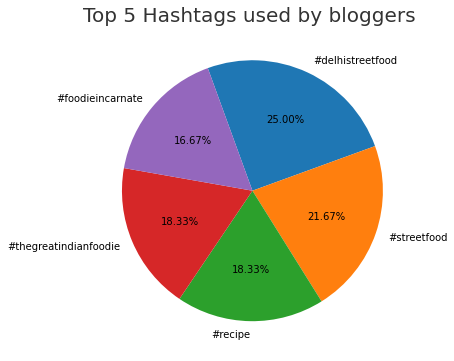

In [23]:
#using the answer od problem 2.2
hashtag_name = [words_list[0][0],words_list[1][0],words_list[2][0],words_list[3][0],words_list[4][0]]
count = [words_list[0][1],words_list[1][1],words_list[2][1],words_list[3][1],words_list[4][1]]
plt.figure(figsize=(12,6))
plt.pie(count,labels=hashtag_name,autopct='%0.2f%%',radius=1,counterclock=False,startangle=110)
plt.title('Top 5 Hashtags used by bloggers ',fontsize=20, color='black',alpha=0.8)
plt.show()

### Problem 3 : Followers : Likes ratio

You need to also calculate average followers : likes ratio for the obtained handles. Followers : Likes ratio is calculated as follows:

1.Find out the likes of the top 10 posts of the 5 handles obtained earlier.

2.Calculate the average likes for a handle.

3.Divide the average likes obtained from the number of followers of the 
handle to get the average followers:like ratio of each handle.

4.Create a bar graph to depict the above obtained information.

### 1.Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [39]:
#This function returns list of likes of 10 post of a user
def get_likes(user):
    try :
            likes = []
            #This fuction will search a user and open that profile
            search_profile(user)
            time.sleep(2)
            #just for scrolling
            driver.execute_script('window.scrollTo(0, 3000);')
            time.sleep(2)
            driver.execute_script('window.scrollTo(0, -3000);')
            time.sleep(2)
            #locating the post of the user
            posts = driver.find_elements('class name','_aagw')
            for post in posts[:10]:
                post.click()
                time.sleep(2)
                try : 
                    #for getting like on video we need to first click on view then only we can like
                    views=WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,'//div[@class="_aaz4"]/section[@class="_aa-7"]/div/span')))
                    views.click()
                    time.sleep(1)
                    
                    #locating like and clicking on it
                    like = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,'//div[@class="_aauu"]/span')))
                    no_of_likes = (like.text).replace(',' , '')
                    likes.append(int(no_of_likes))
                    time.sleep(1)
                    #just clicking one body to get original post back
                    driver.find_element('xpath','/html/body/div[4]').click()
                #if the post is image then this part will execute 
                except TimeoutException :
                    
                    like = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,'//div[@class="_aaz4"]/section[@class="_aa-7"]/div[(contains(@class,"_aacl"))]/span')))
                    no_of_likes = (like.text).replace(',' , '')
                    likes.append(int(no_of_likes))
                    time.sleep(1)
                #locating close button and clicking on it
                close=WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,'//div[@class="o9tjht9c jar9mtx6 mbzxb4f5 njoytozt"]/div')))
                close.click()

                
            return likes
    
    except TimeoutException :
        print ("Something went wrong! Try Again")
        
    

In [48]:
#since selenium works on one window to extract likes i have manuaaly scrolled and stored the data

In [54]:
likes_yourfoodlab=[25648,22495,28895,9457,35388,4371,49751,22485,2577,256363]

In [55]:
print('Number of likes of the top 10 posts of',user,':')
for i in likes_yourfoodlab :
    print(i,'Likes')
print()

Number of likes of the top 10 posts of youfoodlab :
25648 Likes
22495 Likes
28895 Likes
9457 Likes
35388 Likes
4371 Likes
49751 Likes
22485 Likes
2577 Likes
256363 Likes



In [56]:
likes_foddie_incarnate=[3486,19056,24105,6072,144838,31020,94904,17061,20425,11208]


In [57]:
print('Number of likes of the top 10 posts of',user,':')
for i in likes_foddie_incarnate :
    print(i,'Likes')
print()

Number of likes of the top 10 posts of youfoodlab :
3486 Likes
19056 Likes
24105 Likes
6072 Likes
144838 Likes
31020 Likes
94904 Likes
17061 Likes
20425 Likes
11208 Likes



In [58]:
likes_fodzee=[6671,31481,28041,22679,51562,10114,54118,127950,81788,110054]


In [59]:
print('Number of likes of the top 10 posts of',user,':')
for i in likes_fodzee :
    print(i,'Likes')
print()

Number of likes of the top 10 posts of youfoodlab :
6671 Likes
31481 Likes
28041 Likes
22679 Likes
51562 Likes
10114 Likes
54118 Likes
127950 Likes
81788 Likes
110054 Likes



In [60]:
likes_dilsefoodie=[130,9922,2650,11725,3084,6865,3872,4222,7283,4045]


In [61]:
print('Number of likes of the top 10 posts of',user,':')
for i in likes_dilsefoodie :
    print(i,'Likes')
print()

Number of likes of the top 10 posts of youfoodlab :
130 Likes
9922 Likes
2650 Likes
11725 Likes
3084 Likes
6865 Likes
3872 Likes
4222 Likes
7283 Likes
4045 Likes



In [62]:
likes_thegreat=[6708,3819,8694,1141,1024,1225,1215,1493,2908,594]


In [63]:
print('Number of likes of the top 10 posts of',user,':')
for i in likes_thegreat :
    print(i,'Likes')
print()

Number of likes of the top 10 posts of youfoodlab :
6708 Likes
3819 Likes
8694 Likes
1141 Likes
1024 Likes
1225 Likes
1215 Likes
1493 Likes
2908 Likes
594 Likes



### 2.Calculate the average likes for a handle.

In [74]:
def get_avg_likes(lst):
    s=sum(lst)
    n=len(lst)
    avg=s//n
    return avg

In [75]:
avg_likes=get_avg_likes(likes_yourfoodlab)
avg_like=[]
avg_like.append(avg_likes)

In [76]:
avg_likes=get_avg_likes(likes_foddie_incarnate)
avg_like.append(avg_likes)

In [79]:
avg_likes=get_avg_likes(likes_fodzee)
avg_like.append(avg_likes)

In [81]:
avg_likes=get_avg_likes(likes_dilsefoodie)
avg_like.append(avg_likes)

In [82]:
avg_likes=get_avg_likes(likes_thegreat)
avg_like.append(avg_likes)

In [89]:
print('The average like for each handle are')
a=[]
for key in top_handels:
    a.append(key)
for i in range(len(a)):
    print(a[i],' ',avg_like[i])

The average like for each handle are
yourfoodlab   45743
foodie_incarnate   37217
foodzee   52445
dilsefoodie   5379
thegreatindianfoodie   2882


### 3.Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [113]:
no_of_followers=[]
for value in top_handels.values():
    no_of_followers.append(value)

avg_like_ratio=[]
for i in no_of_followers:
    for j in avg_like:
        a=i//j
    avg_like_ratio.append(a)


In [112]:
print("Average followers to like ratio in each handle :")
a=[]
for key in top_handels:
    a.append(key)
for i in range(len(avg_like_ratio)):
    print(a[i],' ',avg_like_ratio[i])

Average followers to like ratio in each handle :
yourfoodlab   696
foodie_incarnate   476
foodzee   451
dilsefoodie   356
thegreatindianfoodie   126


### 4.Create a bar graph to depict the above obtained information.

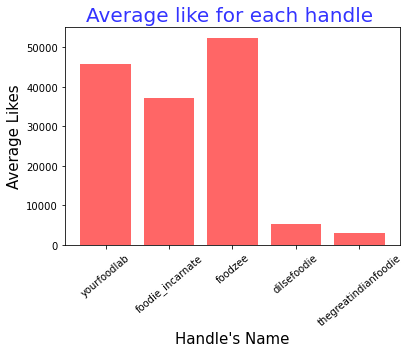

In [125]:
a=[]
for key in top_handels:
    a.append(key)
plt.bar(a,avg_like,color='red',alpha=0.6)
plt.ylabel("Average Likes",size=15)
plt.xlabel("Handle's Name",size=15)
plt.title('Average like for each handle ',fontsize=20, color='blue',alpha=0.8)
plt.xticks(rotation=40)
plt.show()

In [126]:
# Plotting Bar Graph for average followers:like ratio of each handle

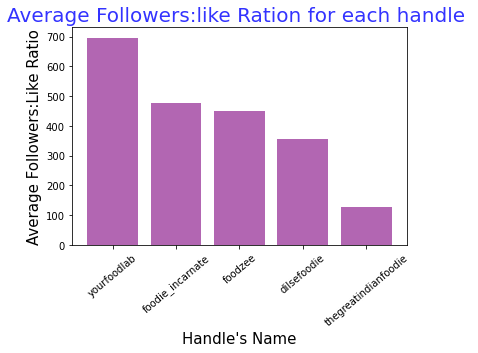

In [128]:
a=[]
for key in top_handels:
    a.append(key)
plt.bar(a,avg_like_ratio,color='purple',alpha=0.6)
plt.ylabel("Average Followers:Like Ratio",size=15)
plt.xlabel("Handle's Name",size=15)
plt.title('Average Followers:like Ration for each handle ',fontsize=20, color='blue',alpha=0.8)
plt.xticks(rotation=40)
plt.show()